##Emotion detection:
https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

Tamaño: 35.9k



*   Train: 24.282
    * Angry: 3995
    * Disgusted: 436
    * Fearful: 4097
    * Happy: 7215
    * Neutral: 4965
    * Sad: 4830
    * surprised: 3171

*   Test: 7178








#Librerias



In [ ]:
import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
sns.set_theme()
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump
from joblib import load

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)



2.12.0


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Montar el drive

In [ ]:
import os
from google.colab import drive

path = "/content/drive/My Drive/Proyecto IA"
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1RJdbXAWiwID162JN0IevNCxkN1GB4qOj/Proyecto IA


#Cargar y procesar los datos

##importar los datos

In [ ]:
imagenes, etiquetas= load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset1.pkl')

In [ ]:
print(imagenes)

[[[ 56  56  61 ...  35  32  29]
  [ 56  55  60 ...  34  31  29]
  [ 54  55  60 ...  34  31  29]
  ...
  [252 197 133 ...  24  23  24]
  [176 126 125 ...  24  25  24]
  [131 131 124 ...  29  28  26]]

 [[ 10  11  10 ... 138 127 121]
  [ 11  11  13 ... 145 128 138]
  [ 10  10  14 ... 147 134 136]
  ...
  [ 24  49  94 ... 157 155 153]
  [ 66  40  62 ... 143 145 156]
  [ 85  69  33 ... 155 133 132]]

 [[192 203 236 ... 236 238 239]
  [176 193 239 ... 240 250 253]
  [178 192 239 ... 255 255 255]
  ...
  [ 92 100 107 ... 174 153 107]
  [255 255 255 ... 255 255 255]
  [252 253 253 ... 255 254 253]]

 ...

 [[233 206 138 ... 167 161 168]
  [239 233 133 ... 173 170 174]
  [243 214  95 ... 148 162 171]
  ...
  [ 56  48  52 ... 170 150 153]
  [ 60  48  58 ... 160 135 137]
  [ 59  46  63 ... 142 138 134]]

 [[212 212 212 ... 207 206 207]
  [211 211 211 ... 206 207 207]
  [212 211 210 ... 207 207 207]
  ...
  [161  37   0 ...  32  54  92]
  [107  39  71 ...  60  20   2]
  [ 30  41  64 ... 186 159 1

In [ ]:
# Cargar el conjunto de datos desde el archivo
datos, datosV, etiquetas, etiquetasV = load('/content/drive/MyDrive/Proyecto IA/ConjuntosDatos/dataset.pkl')

##Pre-procesar los datos

In [ ]:
from sklearn.model_selection import train_test_split

# Separar el 10% de los datos en una nueva variable
datos, datosV, etiquetas, etiquetasV = train_test_split(imagenes, etiquetas, test_size=0.1, random_state=42)

# Verificar el tamaño de los conjuntos de datos
print("Tamaño del conjunto de datos:", len(datos))
print("Tamaño del conjunto de validación:", len(datosV))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datos.reshape(len(datos), -1), etiquetas, test_size=0.3, random_state=22)

#Deep learning


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convertir etiquetas numéricas a formato one-hot
y_train = to_categorical(y_train_encoded, num_classes=7)
y_test = to_categorical(y_test_encoded, num_classes=7)


In [ ]:
# Eliminar la conversión a one-hot para las etiquetas
y_train = y_train_encoded
y_test = y_test_encoded

# Definir el modelo
modeldeep = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(48*48,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 clases de emociones
])

# Compilar el modelo
modeldeep.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
modeldeep.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluar el modelo
test_loss, test_acc = modeldeep.evaluate(X_test, y_test)
print('Precisión en los datos de prueba:', test_acc)


Epoch 1/10
703/703 [==============================] - 6s 7ms/step - loss: 1.8230 - accuracy: 0.2526
Epoch 2/10
703/703 [==============================] - 5s 7ms/step - loss: 1.8129 - accuracy: 0.2527
Epoch 3/10
703/703 [==============================] - 4s 6ms/step - loss: 1.8132 - accuracy: 0.2527
Epoch 4/10
703/703 [==============================] - 5s 7ms/step - loss: 1.8134 - accuracy: 0.2527
Epoch 5/10
703/703 [==============================] - 5s 7ms/step - loss: 1.8131 - accuracy: 0.2527
Epoch 6/10
703/703 [==============================] - 4s 6ms/step - loss: 1.8129 - accuracy: 0.2527
Epoch 7/10
703/703 [==============================] - 4s 6ms/step - loss: 1.8127 - accuracy: 0.2527
Epoch 8/10
703/703 [==============================] - 6s 8ms/step - loss: 1.8129 - accuracy: 0.2527
Epoch 9/10
703/703 [==============================] - 4s 6ms/step - loss: 1.8128 - accuracy: 0.2527
Epoch 10/10
301/301 [==============================] - 1s 2ms/step - loss: 1.8123 - accuracy: 0.2425

In [ ]:
# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

NameError: ignored

##visualizar algunos datos

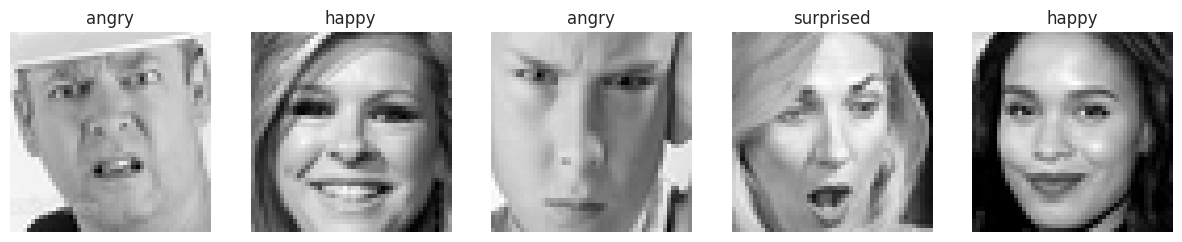

In [ ]:
def visualizar_imagenes(imagenes, etiquetas, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(etiqueta)
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_imagenes(datosV, etiquetasV, num_imagenes_visualizar)

#Cargar modelos

##Modelo 1

In [ ]:
# Cargar el modelo desde el archivo
modelo1 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo1_1.pkl')

##Modelo 2

In [ ]:
# Cargar el modelo desde el archivo
modelo2 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo2_2.pkl')

##Modelo 3

In [ ]:
# Cargar el modelo desde el archivo
modelo3 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo3_3.pkl')

##Modelo 4

In [ ]:
# Cargar el modelo desde el archivo
modelo4 = load('/content/drive/MyDrive/Proyecto IA/Modelos/modelo4bien.pkl')

#Prueba de modelos

##Funcion

In [ ]:
# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

# Modelos

#Preparar los datos de entrenamiento y prueba

In [63]:
X_train, X_test, y_train, y_test = train_test_split(datos.reshape(len(datos), -1), etiquetas, test_size=0.3, random_state=22)

#Modelo 1: Gaussian Naive Bayes


In [64]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparar los datos de entrenamiento y prueba


# Crear y entrenar el modelo Gaussian Naive Bayes
modelo1 = GaussianNB()
modelo1.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo1.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo1:", precision)

Precisión del modelo1: 0.21923356527157545


In [65]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo1, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo1_1.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')


['/content/drive/MyDrive/Proyecto IA/Modelos/modelo1_1.pkl']

Precisión en los datos de validación: 0.2035894559730791


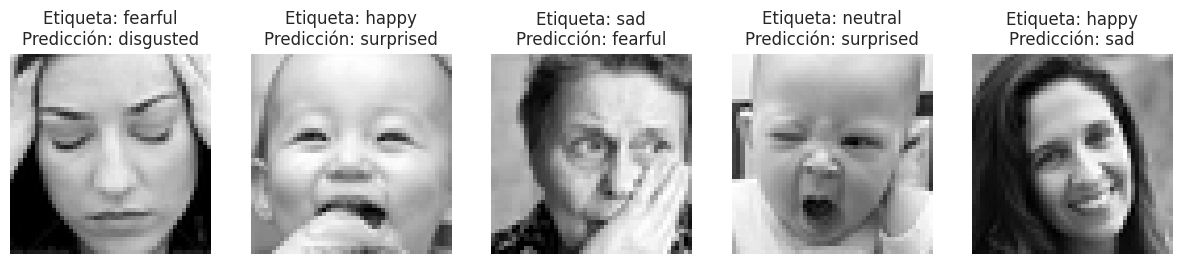

In [66]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo1.predict(X_val)

# Calcular la precisión en los datos de validación
precision_val = accuracy_score(etiquetasV, y_pred_val)
print("Precisión en los datos de validación:", precision_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)


#Modelo 2: Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier


modelo2 = DecisionTreeClassifier(max_depth=8)##que tan grande haga los arboles

modelo2.fit(X_train,y_train)
print(accuracy_score(modelo2.predict(X_test), y_test))

0.31166268563713784


In [54]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo2, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo2_2.pkl')



['/content/drive/MyDrive/Proyecto IA/Modelos/modelo2_2.pkl']

Precisión en los datos de validación: 0.30846887268648343


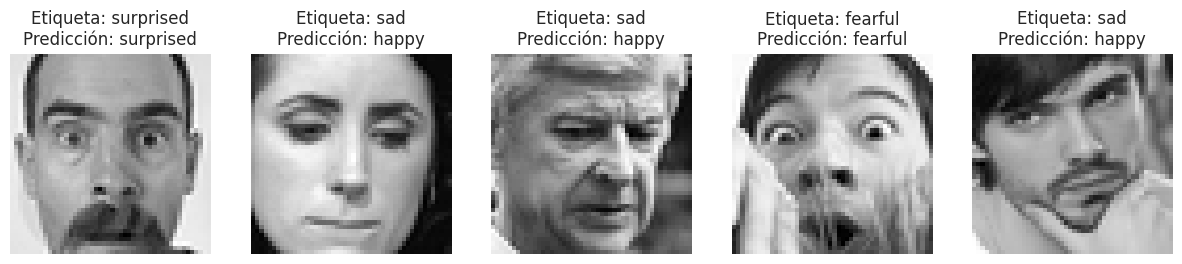

In [57]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo2.predict(X_val)

# Calcular la precisión en los datos de validación
precision_val = accuracy_score(etiquetasV, y_pred_val)
print("Precisión en los datos de validación:", precision_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

##Modelo 3: Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Random Forest
modelo3 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo3.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = modelo3.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Random Forest:", precision)


Precisión del modelo de Random Forest: 0.44635995430470454


In [61]:
from joblib import dump

# Guardar el modelo entrenado en un archivo
dump(modelo3, '/content/drive/MyDrive/Proyecto IA/Modelos/modelo3_3.pkl')

# Cargar el modelo desde el archivo
#modelo1 = joblib.load('/content/drive/Modelos/modelo1.pkl')

['/content/drive/MyDrive/Proyecto IA/Modelos/modelo3_3.pkl']

Precisión en los datos de validación: 0.4461581604038138


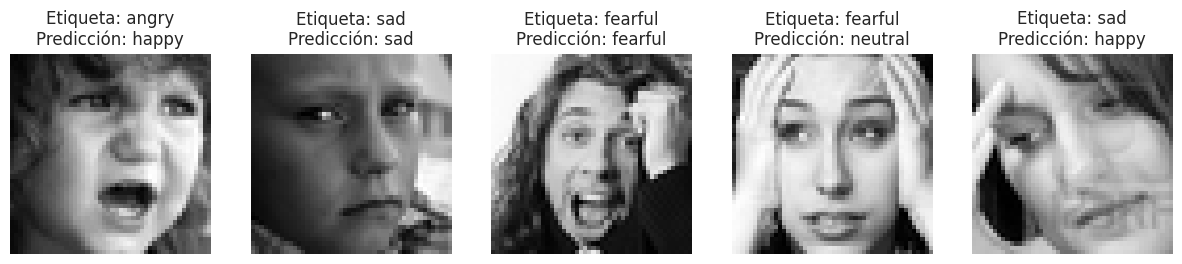

In [62]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo3.predict(X_val)

# Calcular la precisión en los datos de validación
precision_val = accuracy_score(etiquetasV, y_pred_val)
print("Precisión en los datos de validación:", precision_val)

# Visualizar algunas imágenes del conjunto de validación junto con las predicciones del modelo
def visualizar_predicciones(imagenes, etiquetas, predicciones, num_imagenes):
    clases = np.unique(etiquetas)

    fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

    for i in range(num_imagenes):
        indice = np.random.randint(0, len(imagenes))
        imagen = imagenes[indice]
        etiqueta = etiquetas[indice]
        prediccion = predicciones[indice]

        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title(f"Etiqueta: {etiqueta}\nPredicción: {prediccion}")
        axs[i].axis('off')

    plt.show()

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

##Modelo 4: Support Vector Machine

In [ ]:
# Predecir las etiquetas para los datos de prueba
y_pred = modelo4.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo4:", exactitud)

KeyboardInterrupt: ignored

Precisión en los datos de validación: 0.01065619742007852


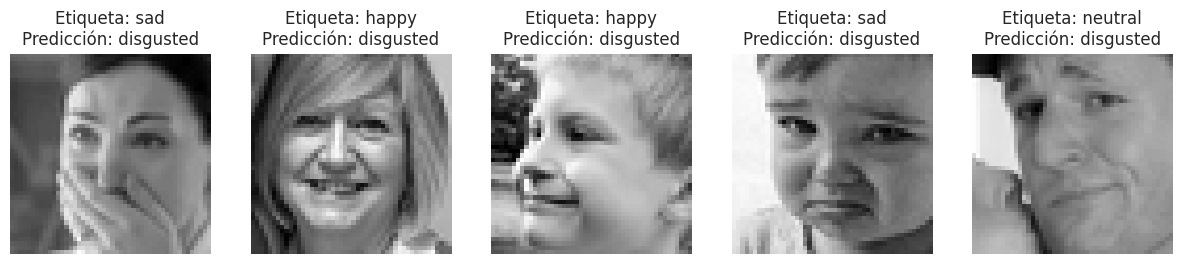

In [ ]:
# Preparar los datos de validación
X_val = datosV.reshape(len(datosV), -1)

# Realizar predicciones en los datos de validación
y_pred_val = modelo4.predict(X_val)

# Calcular la exactitud en los datos de validación
exactitud_val = accuracy_score(etiquetasV, y_pred_val)
print("Exactitud en los datos de validación:", exactitud_val)

num_imagenes_visualizar = 5  # Número de imágenes a visualizar
visualizar_predicciones(datosV, etiquetasV, y_pred_val, num_imagenes_visualizar)

In [ ]:
# Predecir las etiquetas para los datos de prueba
y_pred = modelo5.predict(X_test)

# Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo4:", exactitud)